In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('climate_action_data.csv')

# Inspecting
print(df.head())
print('\n') #for space between the print statements
print(df.info()) 
print('\n')




  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1       IMG-2001  
2       IMG-2002  
3       IMG-2003

In [5]:
print(df.describe())

       Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C)  \
count        913         909              913     913            913   
unique       800         798              750     313            170   
top     SEN-1779  2026-01-02            error    7.54           19.1   
freq           2           2                5      11             13   

       Humidity(%) Crop_Type Fertilizer_Recommended(kg/ha)  \
count          913       909                           913   
unique         448         5                           595   
top           56.0     Wheat                          66.9   
freq             8       203                             8   

       Irrigation_Recommended(mm) Drone_Image_ID  
count                         913            913  
unique                        243            800  
top                           8.0       IMG-2779  
freq                           11              2  


In [9]:
df.shape

(913, 10)

In [2]:
print(df.dtypes)

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [10]:
#  missing values
print("Missing values in each colomn")
df.isnull().sum()

Missing values in each colomn


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [11]:
# Handle missing values

# numerical columns - filled with median
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
               'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handle 'error' values
        df[col] = df[col].fillna(df[col].median())

# categorical columns - filled with mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Check for remaining missing values
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [23]:
# Data in Wrong Format
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Handle empty Crop Type using MODE 
crop_mode = df['Crop_Type'].mode()[0]  # Get the most frequent crop
df['Crop_Type'] = df['Crop_Type'].replace('', pd.NA)  # Replace empty strings with NA
df['Crop_Type'] = df['Crop_Type'].fillna(crop_mode)   # Fill missing crops with mode
# Inspection
print(df.info()) 
print('\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
None


                 

In [24]:
# Wrong Data Types
sensor_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
              'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in sensor_cols:
    if col in df.columns:
       # Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std_dev = df[col].std()
       df[col] = df[col].apply(lambda x: x if (mean - 3 * std_dev < x < mean + 3 * std_dev) else np.nan)
       # Fill NaN values in price columns with the median
       df[col] = df[col].fillna(df[col].median())
# Check data types after conversion
print("Data types after conversion:")   
print(df.dtypes)

Data types after conversion:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [25]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [29]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])

# Check for duplicate dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())

# Remove duplicate dates (keeping first occurrence)
df = df.drop_duplicates(subset=['Date'], keep='first')
# Shape
df.shape

Number of rows after removing duplicates: 799
Number of duplicate dates: 0


(799, 10)

In [33]:
# Final clean dataset
df.info()

# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Converting Date to real date, not string
df['Date'] = pd.to_datetime(df['Date'])

# Converting numeric columns to real number, not string
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

NameError: name 'numeric_cols' is not defined

In [18]:
# Plotting histograms
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Correlation heatmap
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


ValueError: hist method requires numerical or datetime columns, nothing to plot.

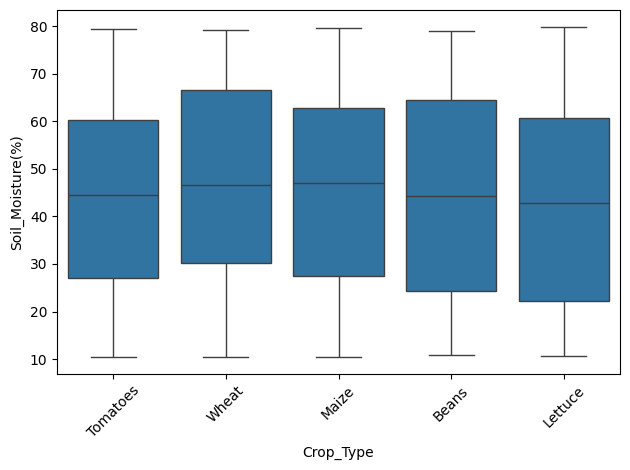

Wheat


In [19]:
# Boxplot of Soil_Moisture by Crop_Type
sns.boxplot(x='Crop_Type', y='Soil_Moisture(%)', data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crop with highest average Soil_Moisture
print(df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax())

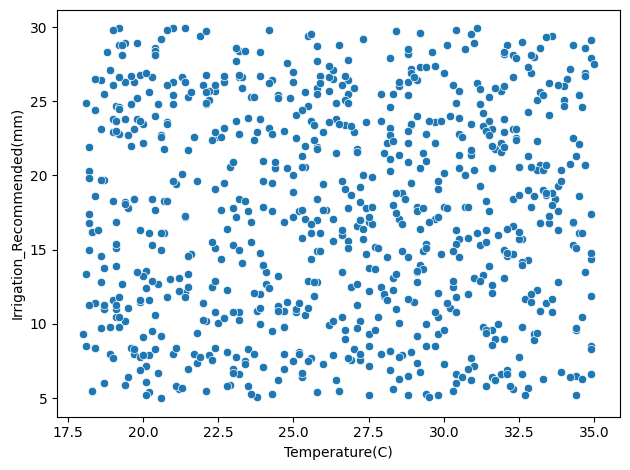

In [20]:
# Analysing irrigation recommended against temperature, to make recommendations
sns.scatterplot(x='Temperature(C)', y='Irrigation_Recommended(mm)', data=df)
plt.tight_layout()
plt.show()

In [21]:
# Saving to new CSV
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)